In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
df = pd.read_csv("Dataset.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop("Unnamed: 32", axis=1, inplace=True)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
df.drop("id", axis=1, inplace=True)

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

<Axes: >

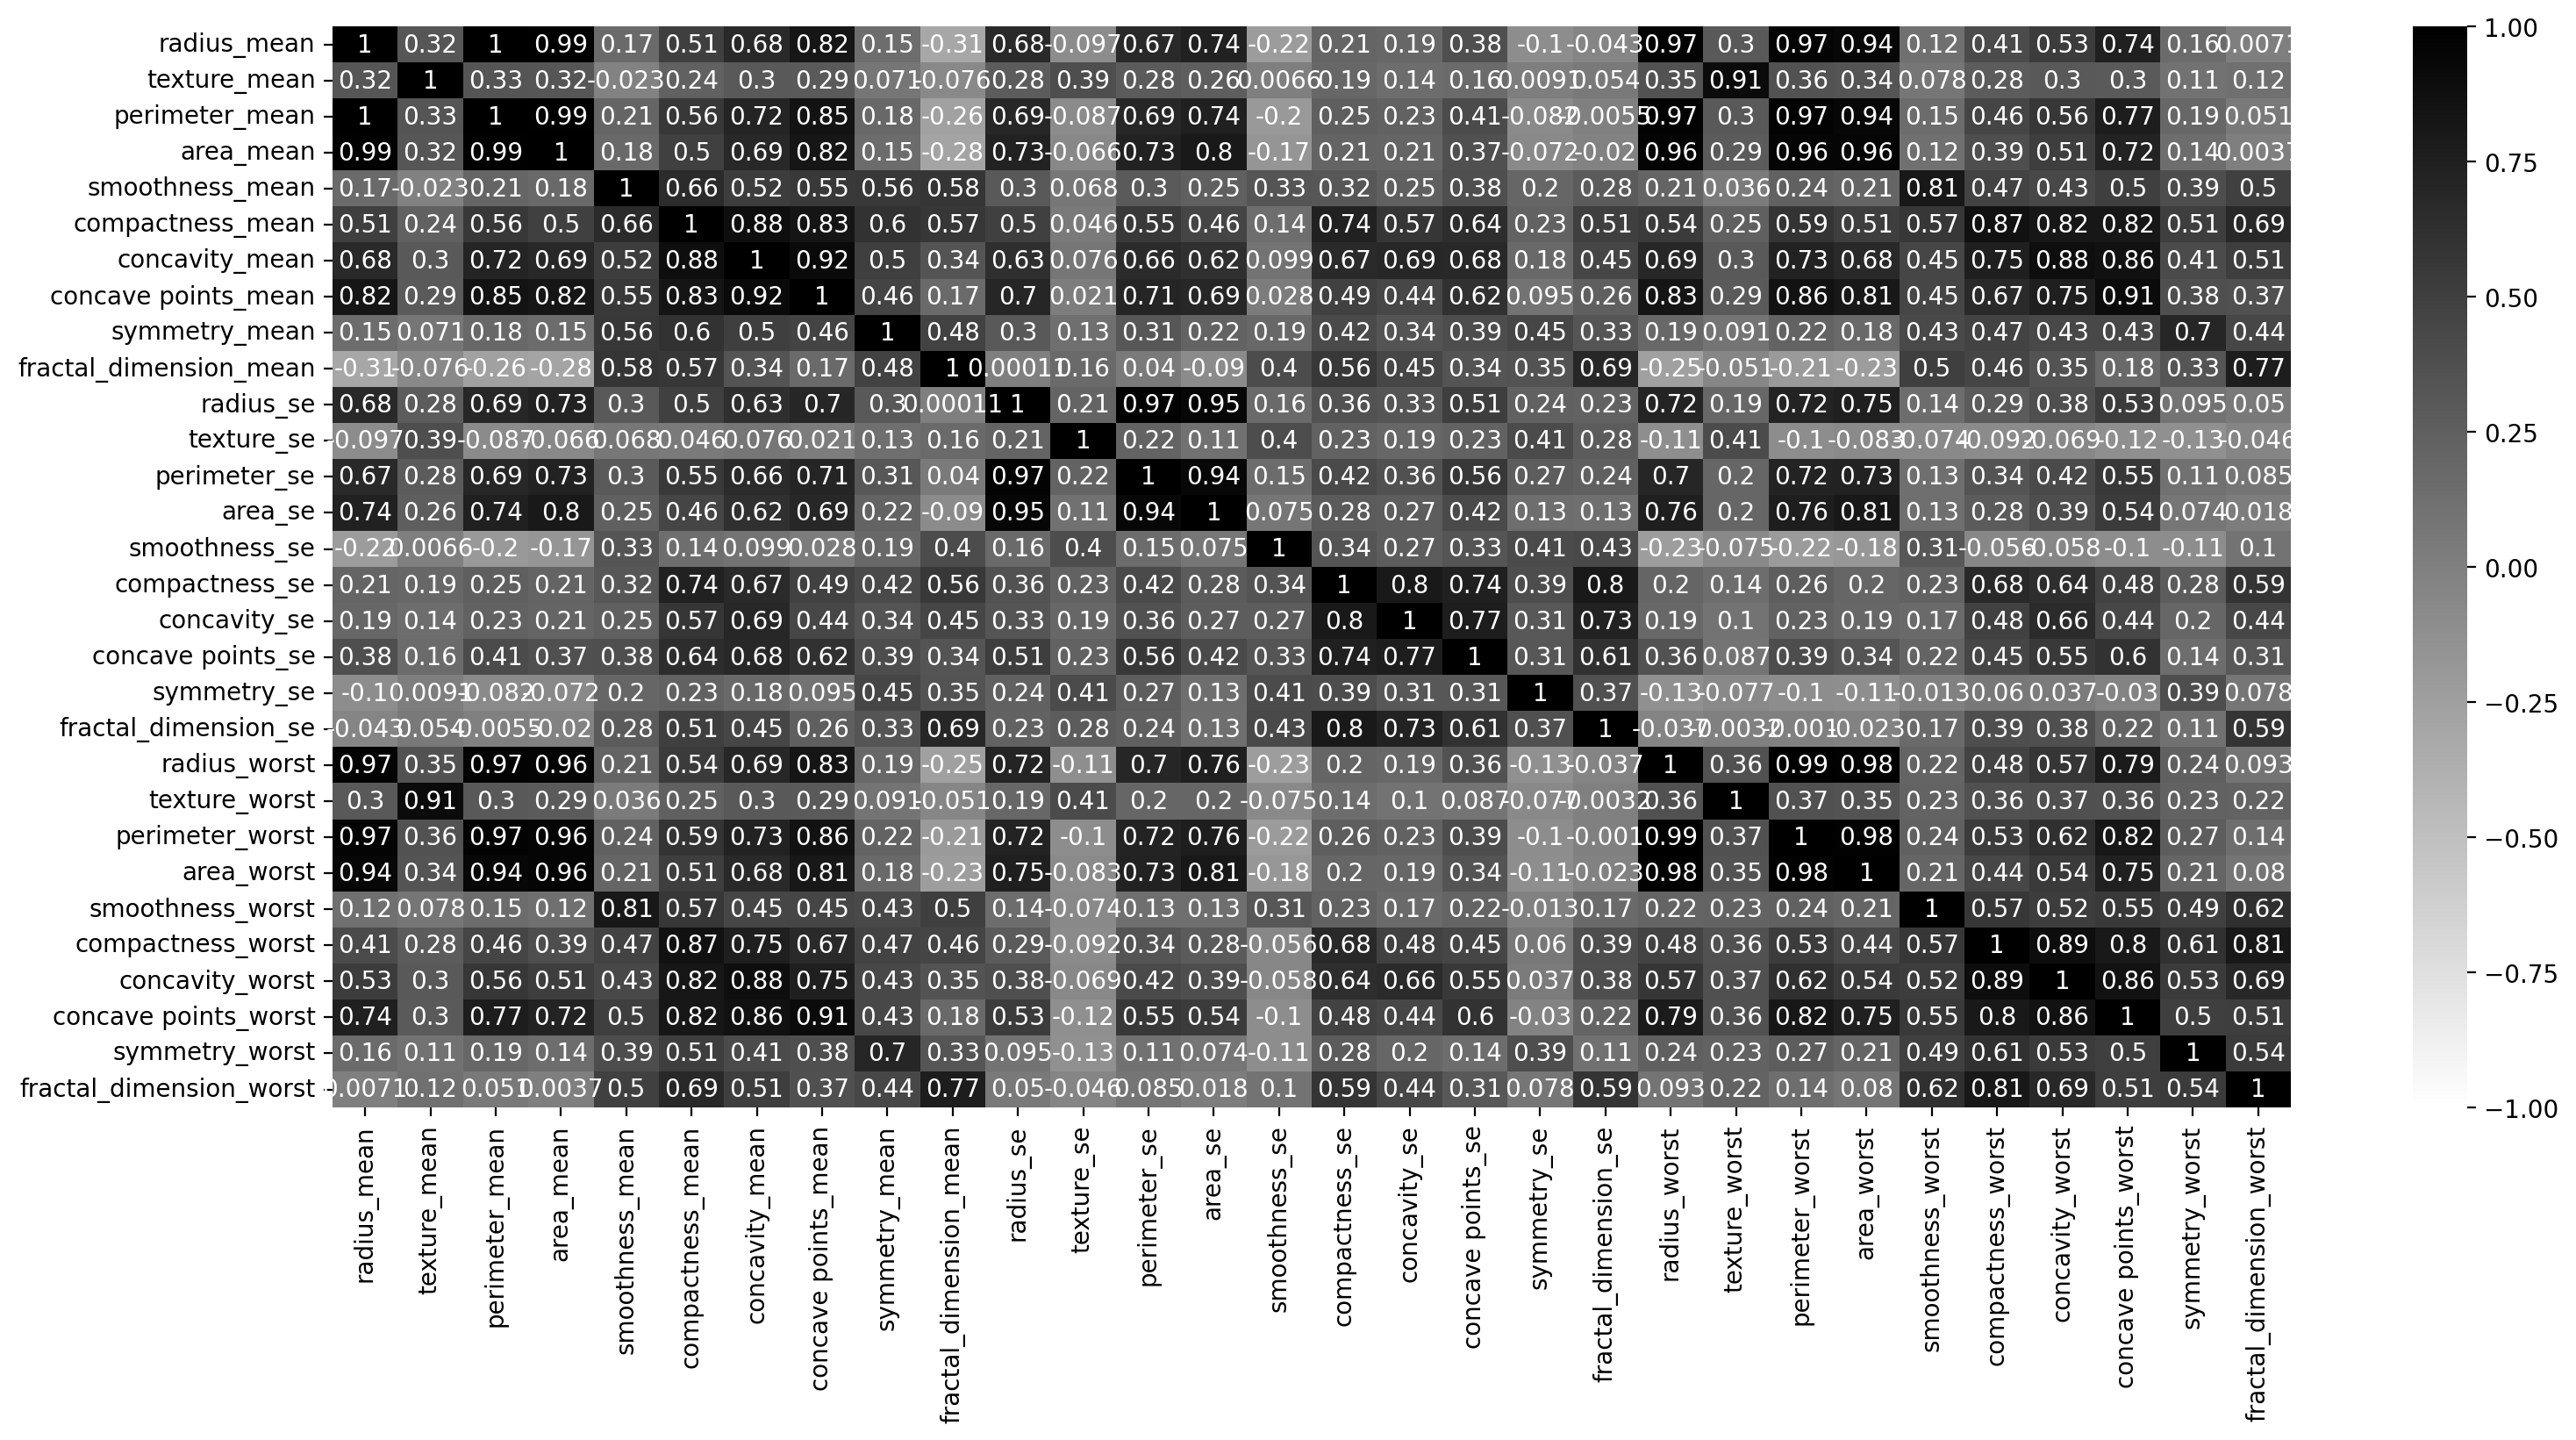

In [ ]:
plt.figure(figsize=(18,8), dpi=200)
corr= df.corr(numeric_only=True)
sns.heatmap(data=corr, vmin=-1, vmax=1,
            cmap='binary', annot= True)

In [ ]:
df_mean_cols = df[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
                    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
print('shape of df_mean_cols:', df_mean_cols.shape)
df_se_cols = df[['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                   'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                   'fractal_dimension_se']]
print('shape of df_se_cols:', df_se_cols.shape)
df_worst_cols = df[['diagnosis','radius_worst', 'texture_worst',
                   'perimeter_worst', 'area_worst', 'smoothness_worst',
                   'compactness_worst', 'concavity_worst', 'concave points_worst',
                   'symmetry_worst', 'fractal_dimension_worst']]
print('shape of df_worst_cols:', df_worst_cols.shape)


shape of df_mean_cols: (569, 11)
shape of df_se_cols: (569, 11)
shape of df_worst_cols: (569, 11)


In [ ]:
# Function to create a box plot
def create_boxplots(data, title):
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='variable', y='value', hue='diagnosis', data=pd.melt(data, id_vars='diagnosis'), palette='Set2')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

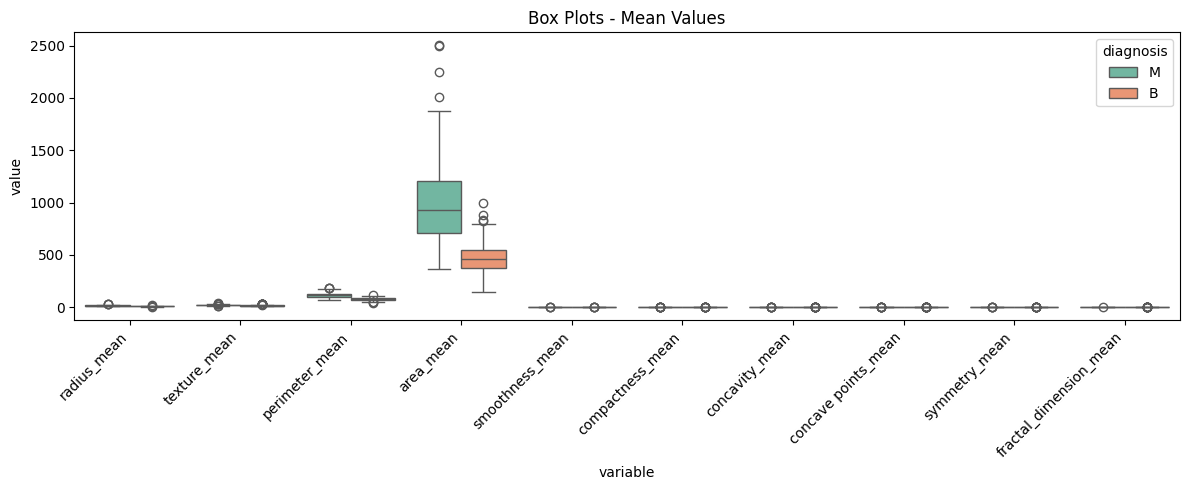

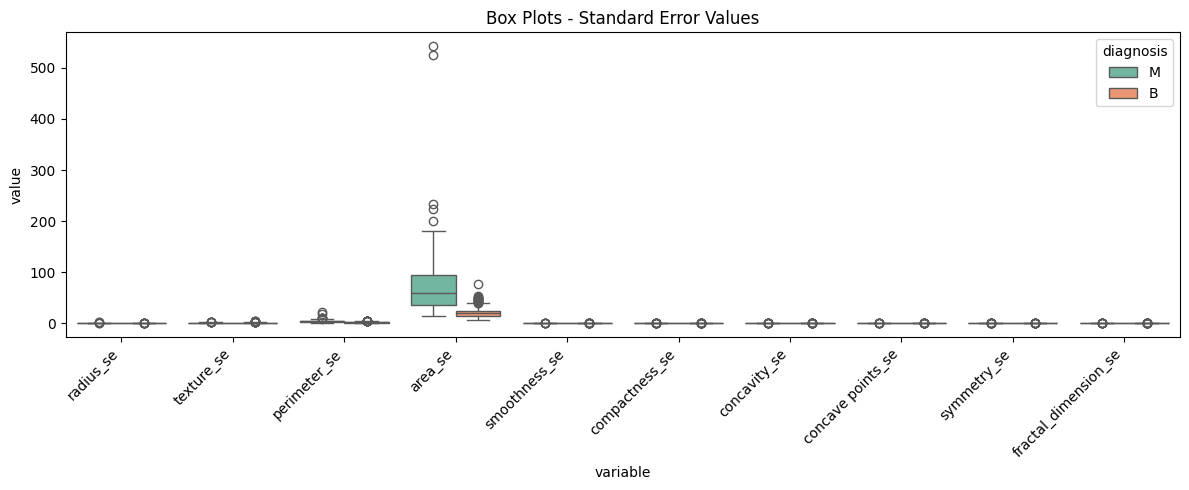

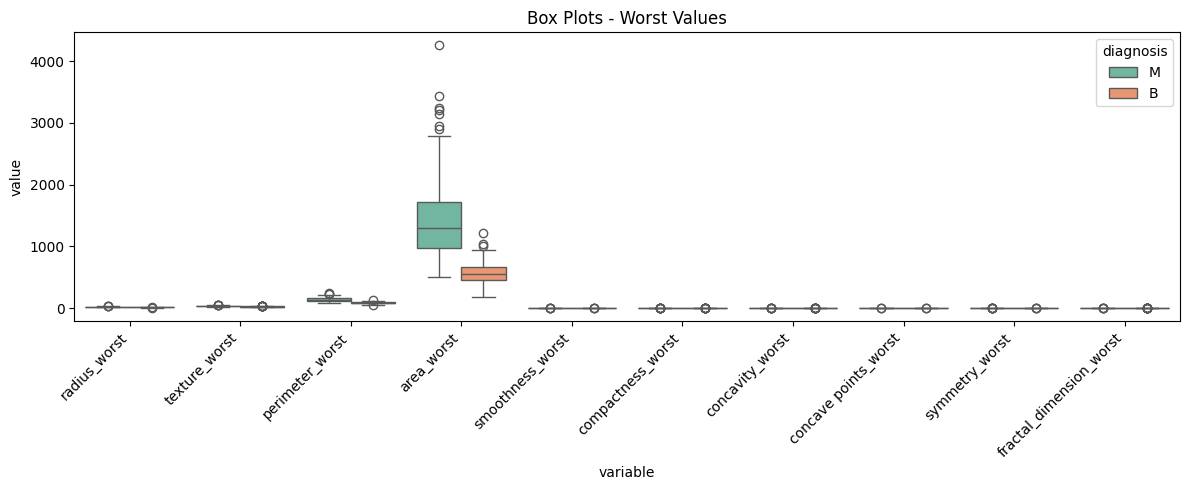

In [ ]:
create_boxplots(df_mean_cols, 'Box Plots - Mean Values')
create_boxplots(df_se_cols, 'Box Plots - Standard Error Values')
create_boxplots(df_worst_cols, 'Box Plots - Worst Values')

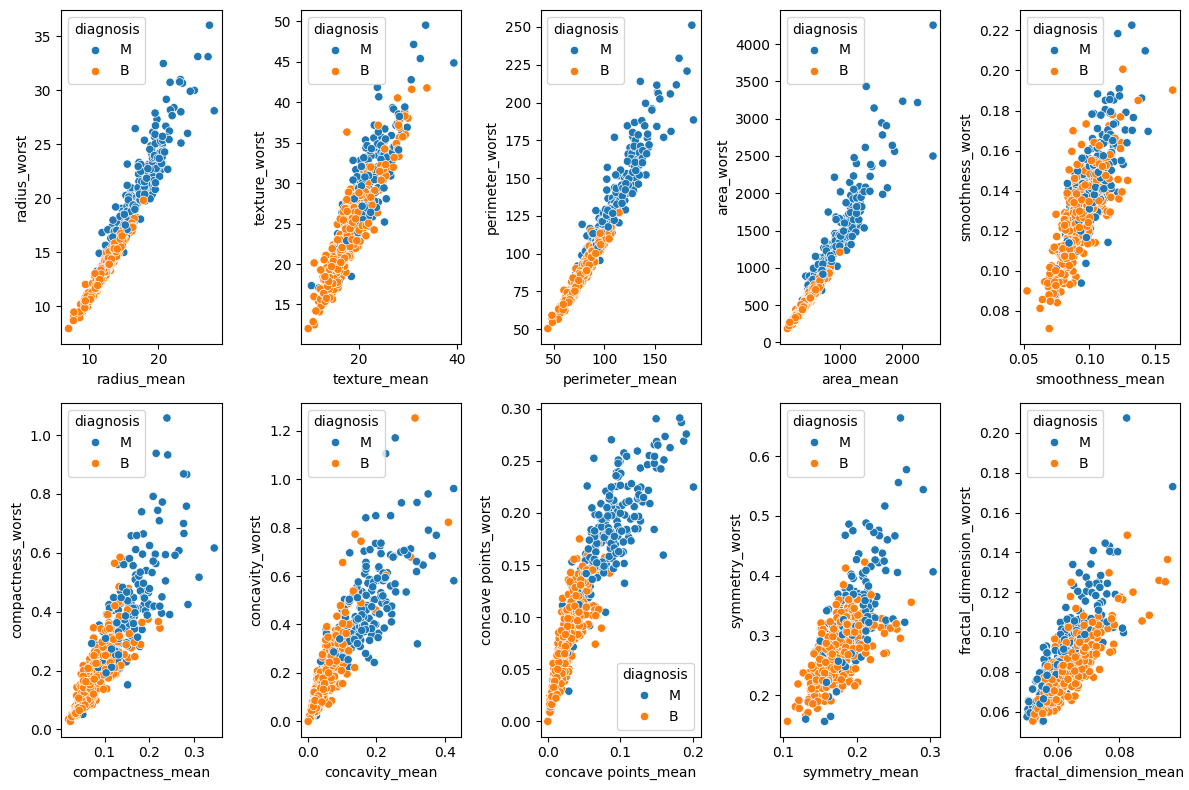

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))

sns.scatterplot(data=df, x='radius_mean', y='radius_worst', hue='diagnosis', ax=axes[0, 0])

sns.scatterplot(data=df, x='texture_mean', y='texture_worst', hue='diagnosis', ax=axes[0, 1])

sns.scatterplot(data=df, x='perimeter_mean', y='perimeter_worst', hue='diagnosis', ax=axes[0, 2])

sns.scatterplot(data=df, x='area_mean', y='area_worst', hue='diagnosis', ax=axes[0, 3])

sns.scatterplot(data=df, x='smoothness_mean', y='smoothness_worst', hue='diagnosis', ax=axes[0, 4])

sns.scatterplot(data=df, x='compactness_mean', y='compactness_worst', hue='diagnosis', ax=axes[1, 0])

sns.scatterplot(data=df, x='concavity_mean', y='concavity_worst', hue='diagnosis', ax=axes[1, 1])

sns.scatterplot(data=df, x='concave points_mean', y='concave points_worst', hue='diagnosis', ax=axes[1,2])

sns.scatterplot(data=df, x='symmetry_mean', y='symmetry_worst', hue='diagnosis', ax=axes[1, 3])

sns.scatterplot(data=df, x='fractal_dimension_mean', y='fractal_dimension_worst', hue='diagnosis', ax=axes[1, 4])
plt.tight_layout()
plt.show()

In [ ]:
#Seperating features and label

X = df.drop('diagnosis', axis=1)
y= df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# Feature Scaling

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Matrice de confusion SVM :
[[71  1]
 [ 1 41]]

Rapport de classification SVM :
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



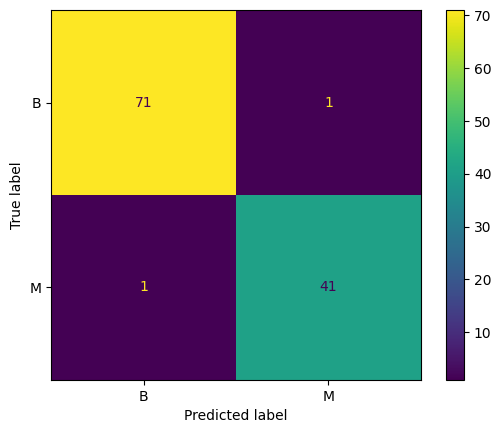

In [ ]:
from sklearn.svm import SVC  # Importation du modèle SVM

# Entraîner un modèle SVM avec les paramètres par défaut
svm_model = SVC(random_state=101)  # Initialisation du modèle
svm_model.fit(scaled_X_train, y_train)  # Entraînement sur les données normalisées

# Prédictions sur les données de test
svm_preds = svm_model.predict(scaled_X_test)

# Évaluation du modèle SVM
print("Matrice de confusion SVM :")
print(confusion_matrix(y_test, svm_preds))

print("\nRapport de classification SVM :")
print(classification_report(y_test, svm_preds))

# Optionnel : Afficher la matrice de confusion
ConfusionMatrixDisplay.from_estimator(svm_model, scaled_X_test, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valeurs possibles pour le paramètre de régularisation
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Types de noyaux
    'gamma': ['scale', 'auto']  # Paramètre gamma
}

# Initialisation de la recherche par grille
grid_search = GridSearchCV(SVC(random_state=101), param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_X_train, y_train)

# Résultats de la recherche
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

# Entraîner le modèle avec les meilleurs paramètres
best_svm_model = grid_search.best_estimator_
best_svm_preds = best_svm_model.predict(scaled_X_test)

# Évaluation
print("\nRapport de classification pour le meilleur modèle SVM :")
print(classification_report(y_test, best_svm_preds))


Meilleurs paramètres trouvés : {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Meilleure précision : 0.9780219780219781

Rapport de classification pour le meilleur modèle SVM :
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
example_patient = [[15.0, 20.0, 100.0, 700.0, 0.1, 0.2, 0.15, 0.08, 0.2, 0.05, 0.5, 1.0, 3.0,
                  50.0, 0.01, 0.03, 0.02, 0.01, 0.02, 0.004, 18.0, 25.0, 120.0, 800.0, 0.14, 0.25, 0.2, 0.1, 0.3, 0.08]]
print(example_patient)

[[15.0, 20.0, 100.0, 700.0, 0.1, 0.2, 0.15, 0.08, 0.2, 0.05, 0.5, 1.0, 3.0, 50.0, 0.01, 0.03, 0.02, 0.01, 0.02, 0.004, 18.0, 25.0, 120.0, 800.0, 0.14, 0.25, 0.2, 0.1, 0.3, 0.08]]


In [ ]:
scaled_example_patient = scaler.transform(example_patient)

# Prédiction avec le modèle SVM
print('Model Prediction (SVM):', svm_model.predict(scaled_example_patient))

Model Prediction (SVM): ['M']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
import joblib

# Enregistrer le modèle SVM et le scaler
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']